In [1]:
import os
import sys

sys.path.append(os.path.join(os.path.expanduser('~'), 'Projects', 'TATSSI'))

# Notebook helpers
from TATSSI.notebooks.helpers.qa_analytics import Analytics
from TATSSI.notebooks.helpers.time_series_analysis import TimeSeriesAnalysis

# Set data directory
source_dir = '../../data/MOD13A2.006/'
# Set product, it must match product name in TATSSI catalogue
product, version = 'MOD13A2', '006'

# Create the QA analytics object
qa_analytics = Analytics(source_dir=source_dir, product=product, version=version)

<IPython.core.display.Javascript object>


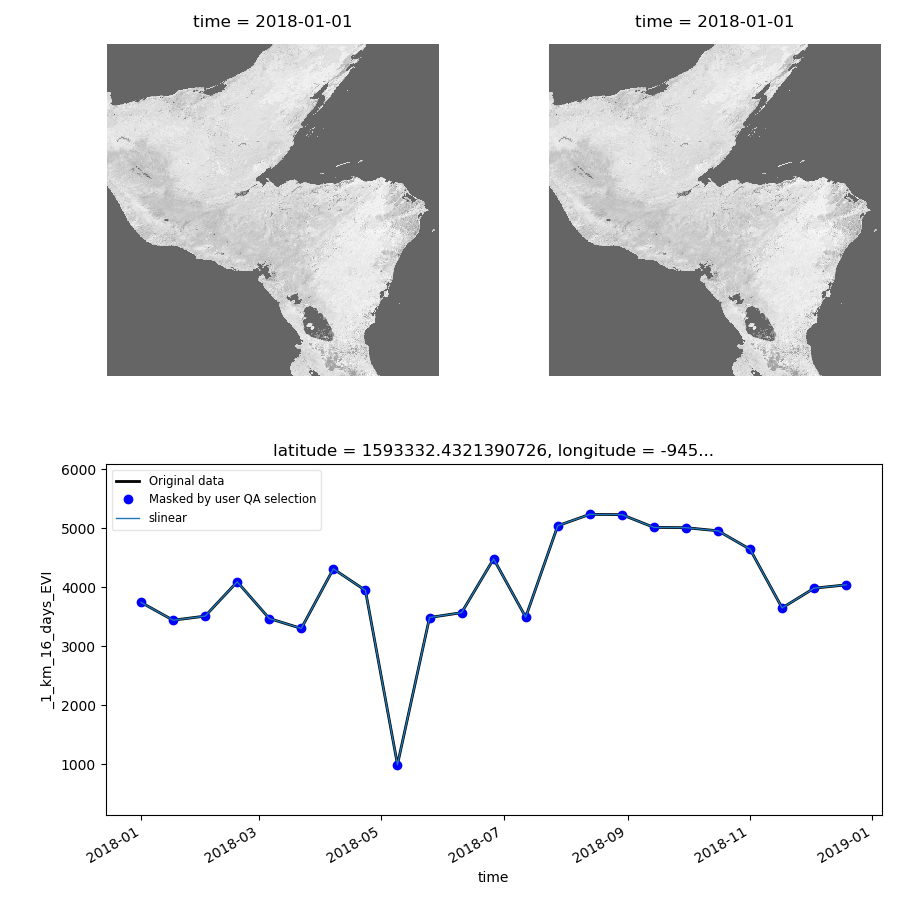

In [2]:
# Time series analysis
tsa = TimeSeriesAnalysis(qa_analytics.ts)

In [3]:
#import numpy as np
#np.histogram(tsa.ts.data._1_km_16_days_EVI)[1]
